# Representaciones graficas: Plots y visualizacion de los datos


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [3]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')

In [4]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Scatter Plot (nuve de puntos o de dispersion)

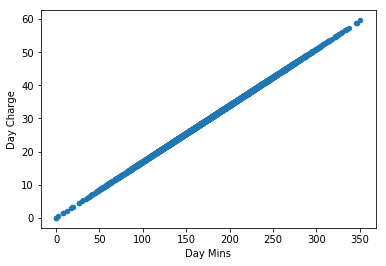

In [19]:
# Es para que los plots te queden en línea, dentro del mismo texto de 
# ejecución en lugar de en una celda separada.
% matplotlib inline

# kind (tipo de diagrama) = 'scatter' (nuve de puntos)
# x (eje x) = 'Day Mins' (nombre de la columna X)
# y (eje y) = 'Day Charge' (nombre de la columna Y)

fig = data.plot(kind = 'scatter', x = "Day Mins", y = 'Day Charge')


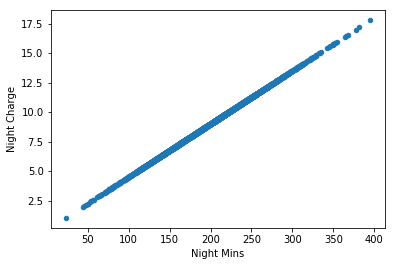

In [7]:
data.plot(kind = 'scatter', x = 'Night Mins', y = 'Night Charge')

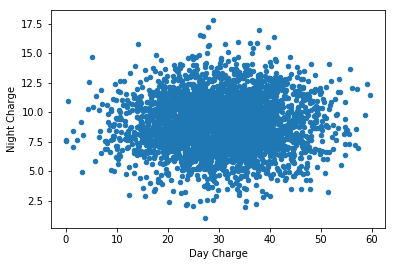

In [8]:
data.plot(kind = 'scatter', x = 'Day Charge', y = 'Night Charge')

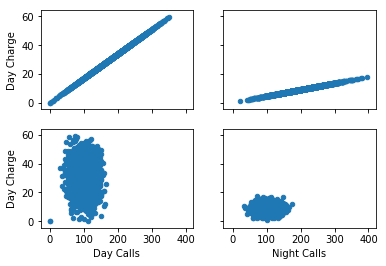

In [26]:
# Creamos dos variables que quedaran asignadas por el paquete matplotlib

#En la variable figure se asigna lo que es la representacion
# En la variable axs los ejes

figure, axs = pl.subplots(2,2, sharey = True, sharex = True)
data.plot(kind = 'scatter', x = 'Day Mins', y = 'Day Charge', ax=axs[0][0])
data.plot(kind = 'scatter', x = 'Night Mins', y = 'Night Charge', ax=axs[0][1])
data.plot(kind = 'scatter', x = 'Day Calls', y = 'Day Charge', ax = axs[1][0])
data.plot(kind = 'scatter', x = 'Night Calls', y = 'Night Charge', ax = axs[1][1])

# Para exportar los resultados 
# savefig('path_donde_guardar_la_imagen.jpeg/png/jpg')

figure.savefig('./fig1.png', dpi = 300)

### Histogramas de frecuancias

(array([  2.,   0.,   0.,   1.,   4.,  15.,  36.,  80., 196., 273., 409.,
        508., 601., 454., 355., 199., 125.,  54.,  14.,   7.]),
 array([  0.  ,   8.25,  16.5 ,  24.75,  33.  ,  41.25,  49.5 ,  57.75,
         66.  ,  74.25,  82.5 ,  90.75,  99.  , 107.25, 115.5 , 123.75,
        132.  , 140.25, 148.5 , 156.75, 165.  ]),
 <a list of 20 Patch objects>)

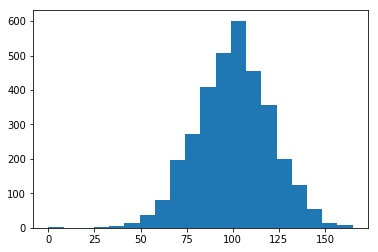

In [53]:
# .hist() nos permite hacer un histograma de frecuencias o diagrama de barras

# El primer parametro son los datos de la columna
# bins = n nos reparte la informacion en n columnas
pl.hist(data['Day Calls'], bins = 20)


Text(0.5,1,'Histograma del numero de llamadas al dia')

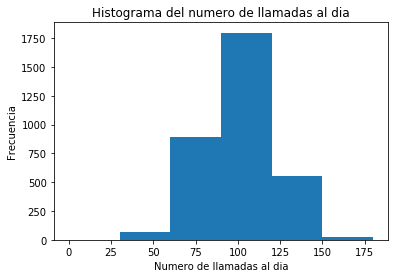

In [54]:
# bins = n tambien nos permite indicar el rango de las divisiones
pl.hist(data['Day Calls'], bins = [0,30,60,90,120,150,180])

# Etiqueta para eje X
pl.xlabel('Numero de llamadas al dia')

# Etiqueta para eje Y
pl.ylabel('Frecuencia')

# Etiqueta para el titulo
pl.title('Histograma del numero de llamadas al dia')

(array([  2.,   0.,   3.,  17.,  92., 261., 532., 809., 812., 495., 222.,
         80.,   8.]),
 array([  0.        ,  12.69230769,  25.38461538,  38.07692308,
         50.76923077,  63.46153846,  76.15384615,  88.84615385,
        101.53846154, 114.23076923, 126.92307692, 139.61538462,
        152.30769231, 165.        ]),
 <a list of 13 Patch objects>)

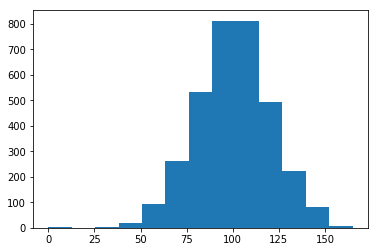

In [55]:
''' 
Para saber con exactitud el numero de divisiones con las que tenemos que 
trabajar, podemos usar la Regla de Sturges

c (columnas) = 1 + log(base 2) de M (Muestra, en este caso 3333 filas)
'''
k = int(np.ceil(1 + np.log2(3333)))
pl.hist(data['Day Calls'], bins = k)

### Boxplot, diagrama de caja y bigotes

'\nInterpretacion:\n\nLa caja representa donde estan la mayoria de los datos. Por debajo de la \ncaja estan el primer 25% de los datos una vez ordenados, por encima de \nla caja estan el 75% de los datos. Por tanto, la caja representa el 50%\nde los datos. La raya naranja representa el percentil 50 indicando el \nvalor que esta justo en medio\n'

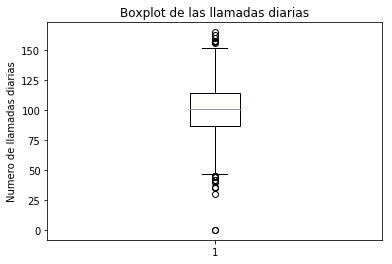

In [59]:
pl.boxplot(data['Day Calls'])
pl.ylabel('Numero de llamadas diarias')
pl.title('Boxplot de las llamadas diarias')

'''
Interpretacion:

La caja representa donde estan la mayoria de los datos. Por debajo de la 
caja estan el primer 25% de los datos una vez ordenados, por encima de 
la caja estan el 75% de los datos. Por tanto, la caja representa el 50%
de los datos. La raya naranja representa el percentil 50 indicando el 
valor que esta justo en medio
'''

In [61]:
data['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [63]:
'''
El manano de la caja viene dado de la resta del percentil 75 - el percentil
25, que da como resultado 27. A esto se le llama rango intercuartilico o IQR
(interquartilie range).
Los bigotes, las lineas negras mas cortas, se suelen poner a 1.5 veces el 
tamano de la caja y los valores que estan mas lejos de esa linea se 
representan con bolitas y se llaman Outlyer (Valor fuera de lugar)
'''

IQR = data['Day Calls'].quantile(0.75)-data['Day Calls'].quantile(0.25)
IQR

27.0

In [65]:
# Cojemos el quantil 25%
data['Day Calls'].quantile(0.25) - 1.5*IQR

# EL resultado es el inicio del bigote inferior

46.5

In [ ]:
# Cojemos el quantil 75%
data['Day Calls'].quantile(0.75) + 1.5*IQR

# EL resultado es el inicio del bigote superior